In [4]:
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
# Since we can't directly extract the data from the image, we'll need to manually input it.
# This is a placeholder for the data, we'll manually input the data in the same order as the image.
# reduction factor 16 results in paper
data = {
    'Dataset': [
        'MNLI', 'QQP', 'SST', 'WGrande', 'IMDB', 'HSwag', 'SocialIQA', 'CosQA', 'SciTail', 
        'Argument', 'CSQA', 'BoolQ', 'MRPC', 'SICK', 'RTE', 'CB'
    ],
    'ST-A': [
        84.32, 90.59, 91.85, 61.09, 93.85, 38.11, 62.41, 60.01, 93.90,
        77.65, 58.91, 75.66, 85.16, 86.20, 71.04, 86.07
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [9]:
# Reduction factor 2 results in paper
data = {
    'Dataset': [
        'MNLI', 'QQP', 'SST', 'WGrande', 'IMDB', 'HSwag', 'SocialIQA', 'CosQA', 'SciTail', 
        'Argument', 'CSQA', 'BoolQ', 'MRPC', 'SICK', 'RTE', 'CB'
    ],
    'ST-A': [
        84.60, 90.57, 92.66, 62.11, 94.20, 39.45, 60.95, 59.32, 94.44,
        76.83, 57.83, 77.14, 86.13, 87.50, 70.68, 87.85
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

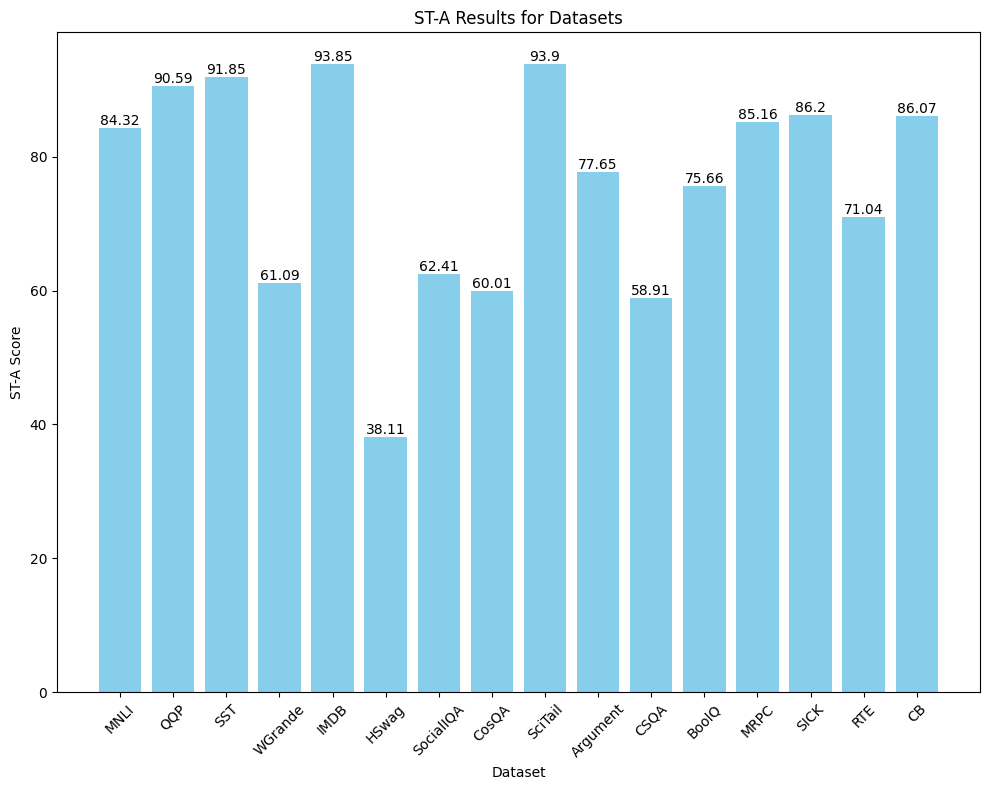

In [11]:
# Plotting
plt.figure(figsize=(10,8))
bars = plt.bar(df['Dataset'], df['ST-A'], color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('ST-A Score')
plt.title('ST-A Results for Datasets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')

plt.xticks(rotation=45)  # Rotate the x labels so they don't overlap
plt.tight_layout()  # Adjust the layout to make room for the x labels

# Show the plot
plt.show()

In [51]:
from pathlib import Path
import json
import ast

name_map = {'MNLI':"mnli", 'QQP':"qqp", 'SST':"sst2", 'WGrande':"winogrande", 
            'IMDB':"imdb", 'HSwag':"hellaswag", 'SocialIQA':"social_i_qa", 'CosQA':"cosmos_qa", 
            'SciTail':"scitail", 'Argument':"argument", 'CSQA':"commonsense_qa", 'BoolQ':"boolq",
            'MRPC':"mrpc", 'SICK':"sick", 'RTE':"rte", 'CB':"cb"}

name_map = {value: key for key, value in name_map.items()}

print(name_map.keys())

dict_keys(['mnli', 'qqp', 'sst2', 'winogrande', 'imdb', 'hellaswag', 'social_i_qa', 'cosmos_qa', 'scitail', 'argument', 'commonsense_qa', 'boolq', 'mrpc', 'sick', 'rte', 'cb'])


## BERT-BASE-UNCASED FULL EXPERIMENTS WITH RF 2

In [11]:
######## OLD FORMAT FROM FIRST RUNS

def txt_to_dict(file_path):
    name = Path(file_path).name.split(".txt")[0].split("results_")[-1]
    print(name)
    contents = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "}" in line:
                a,b = line.split("}")
                contents.append(a)
                contents.append(b)
            else:
                contents.append(line)
    accuracy_lines = [line.rstrip('\n').strip() for line in contents if 'eval_accuracy' in line]
    new_name = name_map[name]
    return new_name,float(accuracy_lines[0].split("= ")[-1])*100

path = "C:/Users/Hector Auvinen/Desktop/eval_results/bigger_eval_steps/output_adapter_redf_2/"
res_path = Path(path)

new_results = {}
for file in res_path.iterdir():
    if file.is_file() and "eval_results" in str(file):
        name,acc = txt_to_dict(file)
        print(name,acc)
        new_results[name] = acc

print(new_results)

argument
Argument 74.82859941234085
boolq
BoolQ 73.79204892966361
cb
CB 89.28571428571429
mrpc
MRPC 86.76470588235294
rte
RTE 65.70397111913357
scitail
SciTail 92.63803680981594
sick
SICK 86.66666666666667
{'Argument': 74.82859941234085, 'BoolQ': 73.79204892966361, 'CB': 89.28571428571429, 'MRPC': 86.76470588235294, 'RTE': 65.70397111913357, 'SciTail': 92.63803680981594, 'SICK': 86.66666666666667}


### BERT-BASE-UNCASED FULL EXPERIMENTS WITH RF 16

In [11]:
def txt_to_dict(file_path):
    name = Path(file_path).name.split(".txt")[0].split("results_")[-1]
    print(name)
    contents = []
    with open(file_path, "r") as file:
        # Read the file content line by line
        lines = file.readlines()
        lines = [line.strip() for line in lines if "eval_accuracy" in line]
        acc = float(lines[0].split("= ")[-1])*100
        new_name = name_map[name]
        return new_name,acc
        

path = "C:/Users/Hector Auvinen/Desktop/eval_results/baseline_16_results/output_adapter_redf_16/"
res_path = Path(path)

new_results = {}
for file in res_path.iterdir():
    if file.is_file() and "eval_results" in str(file.name):
        name,acc = txt_to_dict(file)
        print(name,acc)
        new_results[name] = acc

print(new_results)

argument
Argument 75.36728697355534
boolq
BoolQ 71.98776758409787
cb
CB 87.5
commonsense_qa
CSQA 58.14905814905815
cosmos_qa
CosQA 60.30150753768844
hellaswag
HSwag 38.20952001593308
imdb
IMDB 92.10000000000001
mnli
MNLI 82.88334182373917
mrpc
MRPC 85.7843137254902
qqp
QQP 89.94558496166214
rte
RTE 63.1768953068592
scitail
SciTail 93.71165644171779
sick
SICK 86.06060606060606
social_i_qa
SocialIQA 62.58955987717503
sst2
SST 91.85779816513761
winogrande
WGrande 51.93370165745856
{'Argument': 75.36728697355534, 'BoolQ': 71.98776758409787, 'CB': 87.5, 'CSQA': 58.14905814905815, 'CosQA': 60.30150753768844, 'HSwag': 38.20952001593308, 'IMDB': 92.10000000000001, 'MNLI': 82.88334182373917, 'MRPC': 85.7843137254902, 'QQP': 89.94558496166214, 'RTE': 63.1768953068592, 'SciTail': 93.71165644171779, 'SICK': 86.06060606060606, 'SocialIQA': 62.58955987717503, 'SST': 91.85779816513761, 'WGrande': 51.93370165745856}


      Dataset   ST-A   New-ST-A
0        MNLI  84.32  82.883342
1         QQP  90.59  89.945585
2         SST  91.85  91.857798
3     WGrande  61.09  51.933702
4        IMDB  93.85  92.100000
5       HSwag  38.11  38.209520
6   SocialIQA  62.41  62.589560
7       CosQA  60.01  60.301508
8     SciTail  93.90  93.711656
9    Argument  77.65  75.367287
10       CSQA  58.91  58.149058
11      BoolQ  75.66  71.987768
12       MRPC  85.16  85.784314
13       SICK  86.20  86.060606
14        RTE  71.04  63.176895
15         CB  86.07  87.500000


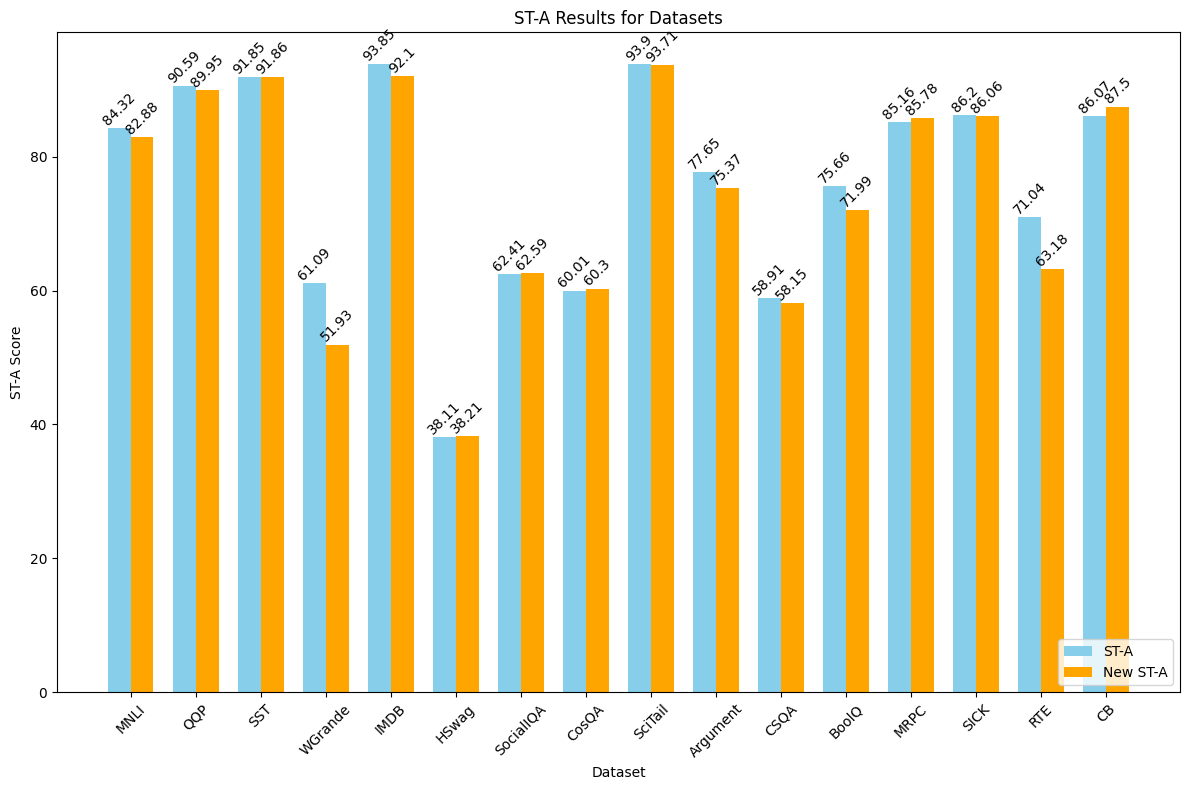

In [12]:
import numpy as np

# Add a new column for the new configuration results
df['New-ST-A'] = df['Dataset'].map(new_results)  # This automatically aligns new results with their respective datasets

print(df)
# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Positions of the left bar-boundaries
r1 = np.arange(len(df['Dataset']))

# Positions of the right bar-boundaries
r2 = [x + bar_width for x in r1]

# Plotting both the original and new results
bars1 = plt.bar(r1, df['ST-A'], color='skyblue', width=bar_width, label='ST-A')
bars2 = plt.bar(r2, df['New-ST-A'], color='orange', width=bar_width, label='New ST-A')

plt.xlabel('Dataset')
plt.ylabel('ST-A Score')
plt.title('ST-A Results for Datasets')

# Adding the text labels above the bars
for bars in (bars1, bars2):
    for bar in bars:
        yval = bar.get_height()
        if not np.isnan(yval):  # Only add text label if the value is not NaN
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center',rotation=45)

# Adding dataset names as x-ticks
plt.xticks([r + bar_width/2 for r in range(len(df['Dataset']))], df['Dataset'], rotation=45)

plt.legend(loc="lower right")
plt.tight_layout()

# Show the plot
plt.show()

## BERT TINY EXPERIMENTS

In [38]:
"""def txt_to_dict(file_path):
    name = Path(file_path).name.split(".txt")[0].split("results_")[-1]
    print(name)
    contents = []
    with open(file_path, "r") as file:
        # Read the file content line by line
        lines = file.readlines()
        lines = [line.strip() for line in lines if "eval_accuracy" in line]
        acc = float(lines[0].split("= ")[-1])*100
        new_name = name_map[name]
        return new_name,acc"""
        
from pathlib import Path

path = "C:/Users/Hector Auvinen/Desktop/eval_results_tiny/test/bert-tiny-uncased/"
res_path = Path(path)

new_results = {}
for config in res_path.iterdir():
    config_results = {config.name:{}}
    for seed in config.iterdir():
        config_results[config.name][seed.name] = {}
        for dataset in seed.iterdir():
            #task = str(dataset).split("eval_results_")[-1].split(".txt")[0]
            task = dataset.name.split("eval_results_")[-1].split(".txt")[0]
            try:
                with open(dataset,"r") as file:
                    lines = file.readlines()
                    line = [float(line.strip().split("= ")[-1]) for line in lines if "eval_accuracy" in line][0]
                    #print(config_results)
                    config_results[config.name][seed.name][task] = line
            except PermissionError as e:
                continue
    new_results.update(config_results)
new_results
        
"""        
    if file.is_file() and "eval_results" in str(file.name):
            name,acc = txt_to_dict(file)
            print(name,acc)
            new_results[name] = acc
"""

print(new_results)

{'output_adapter_redf_16': {'18': {'boolq': 0.6259938837920489, 'cb': 0.7321428571428571, 'mrpc': 0.7083333333333334, 'rte': 0.5595667870036101, 'sick': 0.6161616161616161}, '19': {'boolq': 0.6256880733944954, 'cb': 0.7142857142857143, 'mrpc': 0.7156862745098039, 'rte': 0.5776173285198556, 'sick': 0.6161616161616161}, '32': {'boolq': 0.6250764525993884, 'cb': 0.7321428571428571, 'mrpc': 0.7107843137254902, 'rte': 0.5631768953068592, 'sick': 0.6161616161616161}}, 'output_adapter_redf_2': {'18': {'boolq': 0.6259938837920489, 'cb': 0.7142857142857143, 'mrpc': 0.7058823529411765, 'rte': 0.5884476534296029, 'sick': 0.6404040404040404}, '19': {'boolq': 0.6275229357798165, 'cb': 0.7142857142857143, 'mrpc': 0.7058823529411765, 'rte': 0.5595667870036101, 'sick': 0.6363636363636364}, '32': {'boolq': 0.6247706422018349, 'cb': 0.6964285714285714, 'mrpc': 0.7083333333333334, 'rte': 0.5703971119133574, 'sick': 0.6222222222222222}}, 'output_adapter_redf_32': {'18': {'boolq': 0.6256880733944954, 'cb':

## BERT-MINI EXPERIMENTS WITH DIFFERENT RF

In [47]:
"""def txt_to_dict(file_path):
    name = Path(file_path).name.split(".txt")[0].split("results_")[-1]
    print(name)
    contents = []
    with open(file_path, "r") as file:
        # Read the file content line by line
        lines = file.readlines()
        lines = [line.strip() for line in lines if "eval_accuracy" in line]
        acc = float(lines[0].split("= ")[-1])*100
        new_name = name_map[name]
        return new_name,acc"""
        
from pathlib import Path

# original experiments without rf 1
# path = "C:/Users/Hector Auvinen/Desktop/eval_results_tiny/test/bert-mini-uncased/"

# copied original + rf 1
path = "C:/Users/Hector Auvinen/Desktop/eval_results_tiny/copy_of_test_for_rf_1/bert-mini-uncased/"

res_path = Path(path)

new_results = {}
for config in res_path.iterdir():
    config_results = {config.name:{}}
    for seed in config.iterdir():
        config_results[config.name][seed.name] = {}
        for dataset in seed.iterdir():
            #task = str(dataset).split("eval_results_")[-1].split(".txt")[0]
            task = dataset.name.split("eval_results_")[-1].split(".txt")[0]
            try:
                with open(dataset,"r") as file:
                    lines = file.readlines()
                    line = [float(line.strip().split("= ")[-1]) for line in lines if "eval_accuracy" in line][0]
                    #print(config_results)
                    config_results[config.name][seed.name][task] = line
            except PermissionError as e:
                continue
    new_results.update(config_results)
new_results
        
"""        
    if file.is_file() and "eval_results" in str(file.name):
            name,acc = txt_to_dict(file)
            print(name,acc)
            new_results[name] = acc
"""

print(new_results)

{'output_adapter_redf_1': {'18': {'boolq': 0.6871559633027523, 'cb': 0.6964285714285714, 'mrpc': 0.8088235294117647, 'rte': 0.6173285198555957, 'sick': 0.8424242424242424}, '19': {'boolq': 0.6972477064220184, 'cb': 0.6964285714285714, 'mrpc': 0.8088235294117647, 'rte': 0.6209386281588448, 'sick': 0.8282828282828283}, '32': {'boolq': 0.6975535168195719, 'cb': 0.6964285714285714, 'mrpc': 0.8112745098039216, 'rte': 0.6389891696750902, 'sick': 0.8363636363636363}}, 'output_adapter_redf_16': {'18': {'boolq': 0.6678899082568808, 'cb': 0.6964285714285714, 'mrpc': 0.7181372549019608, 'rte': 0.6173285198555957, 'sick': 0.8101010101010101}, '19': {'boolq': 0.6611620795107034, 'cb': 0.6964285714285714, 'mrpc': 0.8137254901960784, 'rte': 0.6245487364620939, 'sick': 0.8080808080808081}, '32': {'boolq': 0.6724770642201835, 'cb': 0.6964285714285714, 'mrpc': 0.7867647058823529, 'rte': 0.6101083032490975, 'sick': 0.8101010101010101}}, 'output_adapter_redf_2': {'18': {'boolq': 0.6896024464831805, 'cb': 

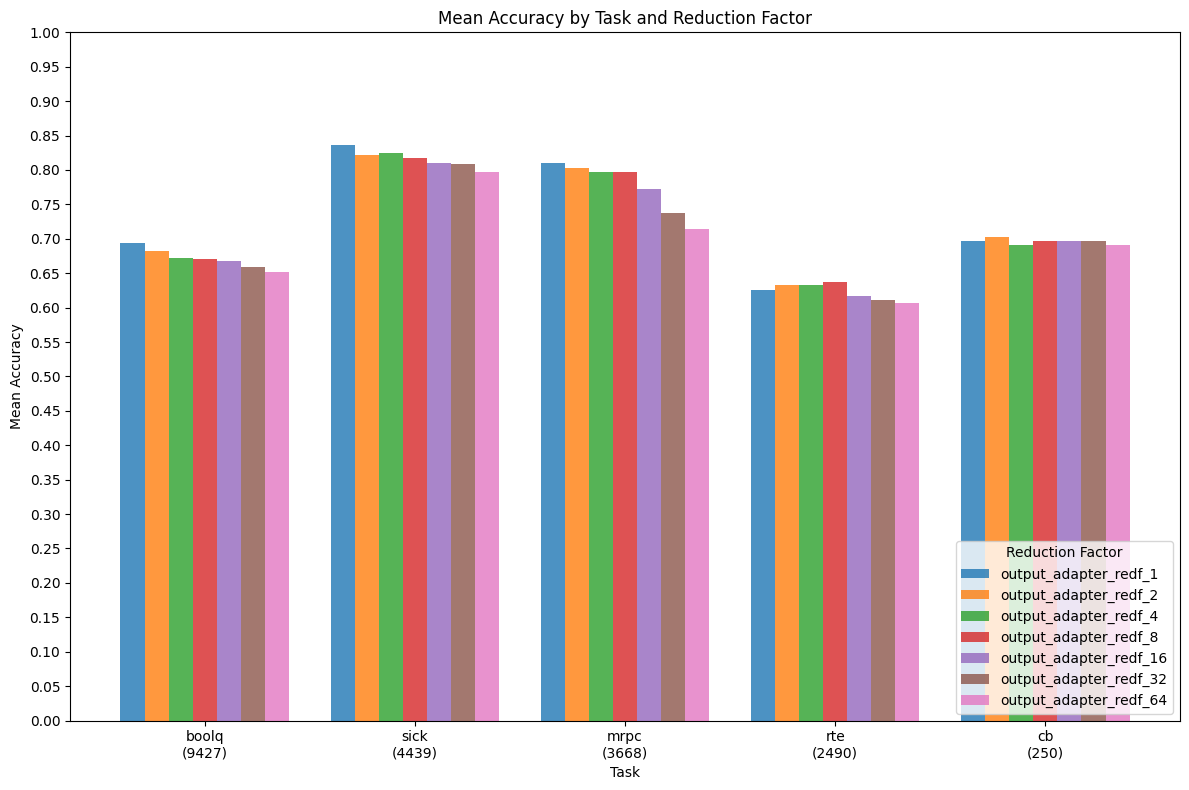

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Your `new_results` dictionary here

# Step 1: Calculate the mean accuracy for each task across seeds for each reduction factor
mean_accuracies = {}
for reduction_factor, seeds in new_results.items():
    for seed, tasks in seeds.items():
        for task, accuracy in tasks.items():
            if task not in mean_accuracies:
                mean_accuracies[task] = {}
            if reduction_factor not in mean_accuracies[task]:
                mean_accuracies[task][reduction_factor] = []
            mean_accuracies[task][reduction_factor].append(accuracy)

# Calculate mean
for task, reduction_factors in mean_accuracies.items():
    for reduction_factor, accuracies in reduction_factors.items():
        mean_accuracies[task][reduction_factor] = np.mean(accuracies)

# Step 2: Organize the data for plotting
reduction_factors = list(new_results.keys())
# Sort by numeric value in the reduction factor name
sorted_reduction_factors = sorted(reduction_factors, key=lambda x: int(x.split('_')[-1]))


# CHANGED
# Adjust the organization of data for plotting based on sorted reduction factors
# tasks = list(mean_accuracies.keys())
"""dataset_order_by_size = [
    'mnli', 'qqp', 'sst2', 'winogrande', 'imdb', 'hellaswag',
    'social_i_qa', 'cosmos_qa', 'scitail', 'argument',
    'commonsense_qa', 'boolq', 'mrpc', 'sick', 'rte', 'cb'
]"""

# Sort tasks according to the predefined dataset order by size
# tasks = [task for task in dataset_order_by_size if task in mean_accuracies]
DATASET_SIZES = {'mnli':392702, 'qqp':	363849, 'sst2':67349, 'winogrande':40398, 'imdb':25000, 'hellaswag':39905,
    'social_i_qa':33410, 'cosmos_qa':25262, 'scitail':23097, 'argument':18341,
    'commonsense_qa':9741, 'boolq':9427, 'mrpc':3668, 'sick':4439, 'rte':2490, 'cb':250}
tasks = sorted(
    [task for task in mean_accuracies.keys() if task in DATASET_SIZES],
    key=lambda task: DATASET_SIZES[task],
    reverse=True
)
labels = [f"{task}\n({DATASET_SIZES[task]})" for task in tasks]
# CHANGED


data = {reduction_factor: [] for reduction_factor in sorted_reduction_factors}
for task in tasks:
    for reduction_factor in sorted_reduction_factors:
        data[reduction_factor].append(mean_accuracies[task].get(reduction_factor, np.nan))

# Step 3: Adjust plotting to use sorted reduction factors
plt.figure(figsize=(12, 8))


#bar_width = 0.15
num_reduction_factors = len(sorted_reduction_factors)
bar_width = 0.8 / num_reduction_factors

# Adjust for loop to iterate over sorted_reduction_factors
for i, reduction_factor in enumerate(sorted_reduction_factors):
    positions = np.arange(len(tasks)) + i * bar_width
    plt.bar(positions, data[reduction_factor], width=bar_width,alpha=0.8, label=reduction_factor)

plt.yticks(np.arange(0, 1.05, 0.05))  # For higher resolution on y-axis
plt.xlabel('Task')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Task and Reduction Factor')
labels = [f"{task}\n({DATASET_SIZES[task]} training samples)" for task in tasks]
plt.xticks(np.arange(len(tasks)) + bar_width * (len(sorted_reduction_factors) - 1) / 2, labels)
plt.legend(title="Reduction Factor", loc="lower right")
plt.tight_layout()
plt.show()
